In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

Data downloaded from (Medicare website)[https://data.medicare.gov/data/hospital-compare]

In [2]:
df = pd.read_csv('hospital.csv')

df.Score = pd.to_numeric(df.Score, errors='coerce')
df = df.dropna(subset=['Score'])
df.head()




,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MSPB-1,Medicare hospital spending per patient (Medica...,0.99,NaN,01/01/2017,12/31/2017
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,MSPB-1,Medicare hospital spending per patient (Medica...,1.01,NaN,01/01/2017,12/31/2017
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,MSPB-1,Medicare hospital spending per patient (Medica...,0.99,NaN,01/01/2017,12/31/2017
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,MSPB-1,Medicare hospital spending per patient (Medica...,1.08,NaN,01/01/2017,12/31/2017
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,MSPB-1,Medicare hospital spending per patient (Medica...,1.06,NaN,01/01/2017,12/31/2017


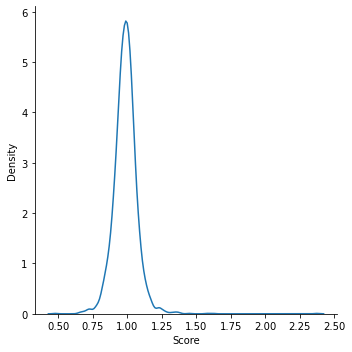

In [3]:
sns.displot(data=df, x='Score', kind='kde')

'UT mean: 0.982'

'UT sd: 0.06019508514706223'

'IL mean: 1.0065322580645162'

'IL sd: 0.06586564737253241'

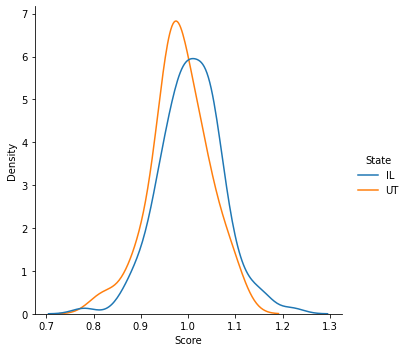

In [15]:
sns.displot(data=df[df.State.isin(['UT','IL'])],x='Score', hue='State', kind='kde', common_norm=False)

display(f'UT mean: {df[df.State=="UT"].Score.mean()}')
display(f'UT sd: {df[df.State=="UT"].Score.std()}')
display(f'IL mean: {df[df.State=="IL"].Score.mean()}')
display(f'IL sd: {df[df.State=="IL"].Score.std()}')

In [ ]:
# Is the difference in scores between UT and IL statistically significant? Can use a t-test.

In [12]:
stats.ttest_ind(df[df.State=='UT'].Score, df[df.State=='IL'].Score)

Ttest_indResult(statistic=-1.8600548613105867, pvalue=0.06481021813240828)

In [ ]:
# Not a 5% threshold, but 6% is pretty convincing. Maybe the cost of living is higher in Illinois.

'AK mean: 0.8587500000000001'

'AK sd: 0.05617256574927963'

'AL mean: 0.9960000000000002'

'AL sd: 0.062472272330423385'

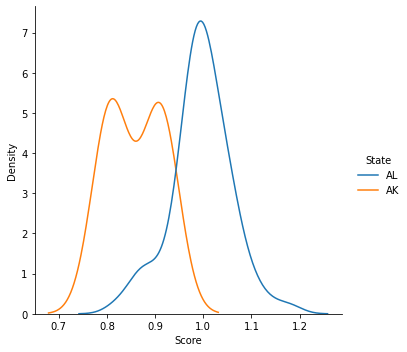

In [16]:
sns.displot(data=df[df.State.isin(['AL','AK'])],x='Score', hue='State', kind='kde', common_norm=False)

display(f'AK mean: {df[df.State=="AK"].Score.mean()}')
display(f'AK sd: {df[df.State=="AK"].Score.std()}')
display(f'AL mean: {df[df.State=="AL"].Score.mean()}')
display(f'AL sd: {df[df.State=="AL"].Score.std()}')

In [17]:
stats.ttest_ind(df[df.State=='AK'].Score, df[df.State=='AL'].Score)

Ttest_indResult(statistic=-5.97152536258611, pvalue=5.1396471850440224e-08)